# Basic Step of Data Analysis
## Data Collection
## Data Exploration
## Data Cleaning
## Data Binning
## Data Visualization
## One hot Encoding
## Feature Engineering
## Model Building

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_data=pd.read_csv('train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

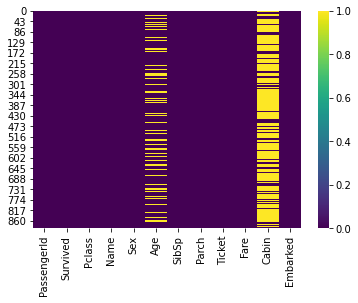

In [7]:
sns.heatmap(titanic_data.isnull(),cmap='viridis')

# How many People were survived and how many were dead?

In [8]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

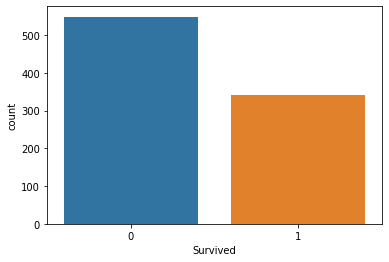

In [9]:
sns.countplot(x='Survived',data=titanic_data)

In [10]:
# How many males and females were travelling on that ship?
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

# How many Females and Males were survived?

In [11]:
titanic_data.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [12]:
titanic_data.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

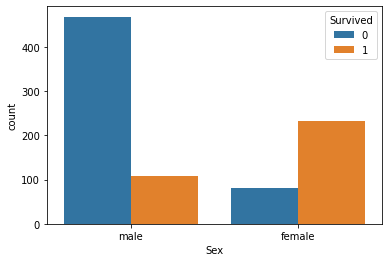

In [13]:
# Hue Paramter
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

# What is the survival rate of Males?

In [14]:
# Survival Rate = No. of males Survived/Total no. of Males
titanic_data.groupby('Sex')['Survived'].value_counts()[3]/titanic_data['Sex'].value_counts()[0]*100

18.890814558058924

In [15]:
109/577*100

18.890814558058924

# What is the Survival Rate for Females?

In [16]:
# Survival Rate = No. of females Survived/Total no. of Females
titanic_data.groupby('Sex')['Survived'].value_counts()[0]/titanic_data['Sex'].value_counts()[1]*100

74.20382165605095

In [17]:
233/314*100

74.20382165605095

# Groupby 

In [18]:
# Groupby
titanic_data.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

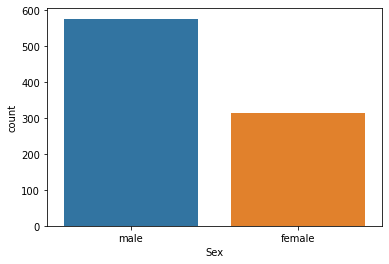

In [19]:
sns.countplot(x='Sex',data=titanic_data)
plt.show()

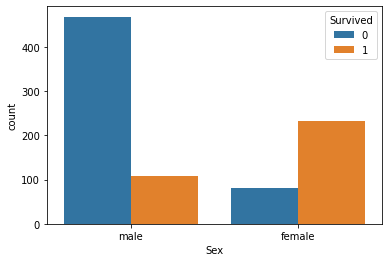

In [20]:
sns.countplot(x='Sex',hue='Survived',data=titanic_data)
plt.show()

# In which Passenger class the people were more safe?

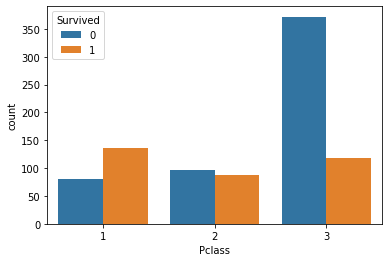

In [21]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)
plt.show()

# Assignment-01 How many People were Travelling Alone?

In [22]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
Alone = titanic_data[(titanic_data['SibSp']== 0) & (titanic_data['Parch']== 0)]
Alone

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
Alone.shape[0]
print('There are total {} People Travelling Alone out of {} People.'.format(Alone.shape[0],titanic_data.shape[0]))

There are total 537 People Travelling Alone out of 891 People.


In [25]:
alone=titanic_data[(titanic_data['SibSp']==0) & (titanic_data['Parch']==0)]
not_alone=titanic_data[(titanic_data['SibSp']!=0) | (titanic_data['Parch']!=0)]

In [26]:
alone.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [27]:
not_alone.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


# What is the Survival Rate of the Person Travelling Alone?

In [28]:
alone['Survived'].value_counts()

0    374
1    163
Name: Survived, dtype: int64

# Q.1. Where survival rate is more, people were travelling alone or people with travelling either parents or siblings?

In [29]:
not_alone.Survived.value_counts(normalize=True)*100

1    50.564972
0    49.435028
Name: Survived, dtype: float64

In [30]:
alone['Survived'].value_counts(normalize=True)*100

0    69.646182
1    30.353818
Name: Survived, dtype: float64

# Assignment-02: Where the survival rate is more people travelling with parents(Parch) only or people travelling with siblings only?

In [31]:
parents=titanic_data[(titanic_data['Parch']!=0) & (titanic_data['SibSp']==0)]

In [32]:
parents.shape[0]

71

In [33]:
Parents=parents.Survived.value_counts(normalize=True)*100
Parents

1    66.197183
0    33.802817
Name: Survived, dtype: float64

In [34]:
Parents[1]

66.19718309859155

In [35]:
parents.shape[0]
print('There are total {} People Travelling With parents.'.format(parents.shape[0]))
print('When people travelling with parents survival rate is {}.'.format(Parents[1]))

There are total 71 People Travelling With parents.
When people travelling with parents survival rate is 66.19718309859155.


In [36]:
siblings=titanic_data[(titanic_data['Parch']==0) & (titanic_data['SibSp']!=0)]

In [37]:
siblings.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [38]:
siblings.shape[0]

141

In [39]:
Siblings = siblings.Survived.value_counts(normalize=True)*100
Siblings

0    50.35461
1    49.64539
Name: Survived, dtype: float64

In [40]:
siblings.shape[0]
print('There are total {} People Travelling With Siblings.'.format(siblings.shape[0]))
print('When people travelling with Siblings survival rate is {}.'.format(Siblings[1]))

There are total 141 People Travelling With Siblings.
When people travelling with Siblings survival rate is 49.645390070921984.


In [41]:
print('There are People Traveling With parents Survival rate is {} and People Traveling With Siblings survival rate is {}.'.format(Parents[1],Siblings[1]))

There are People Traveling With parents Survival rate is 66.19718309859155 and People Traveling With Siblings survival rate is 49.645390070921984.


In [42]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# How many people were survived from different Pclass based on gender

In [43]:
titanic_data.groupby(['Pclass','Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

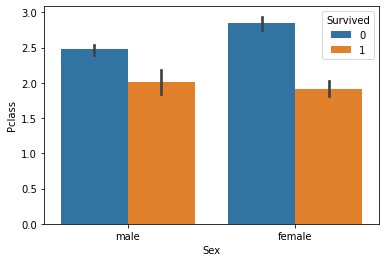

In [44]:
sns.barplot(x='Sex',y='Pclass',hue='Survived',data=titanic_data)

<AxesSubplot:xlabel='Pclass,Sex,Survived'>

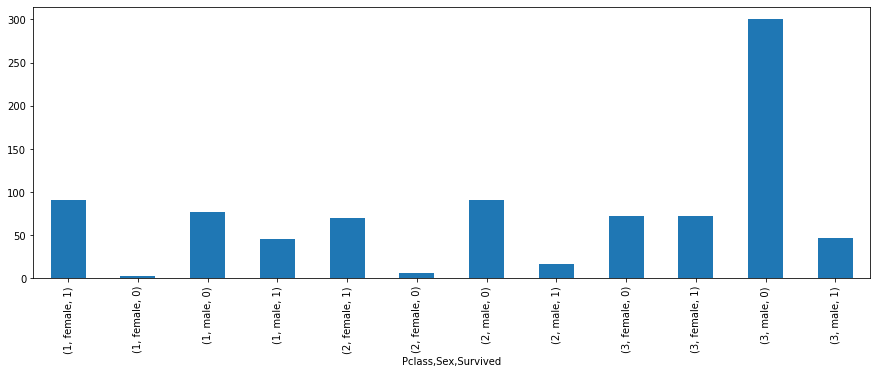

In [45]:
plt.figure(figsize=(15,5))
titanic_data.groupby(['Pclass','Sex'])['Survived'].value_counts().plot(kind='bar')

In [46]:
titanic_data.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

# which passenger class contains more fare on the basis gender?

In [47]:
titanic_data.groupby(['Pclass','Sex'])['Fare'].mean()

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Pclass,Sex'>

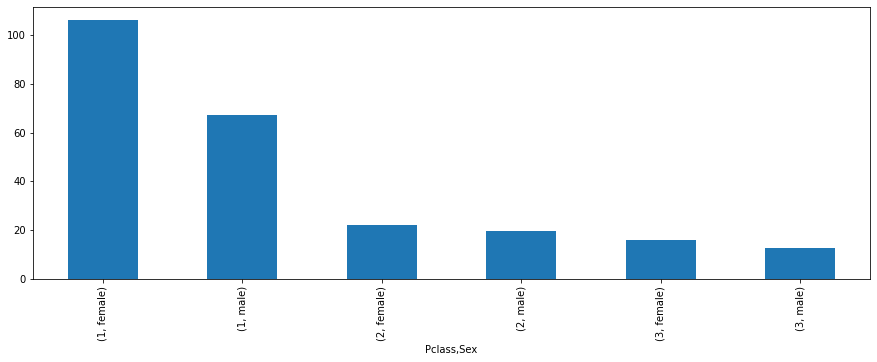

In [48]:
plt.figure(figsize=(15,5))
titanic_data.groupby(['Pclass','Sex'])['Fare'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

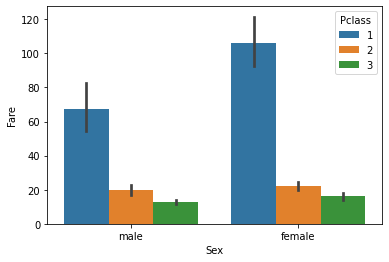

In [49]:
sns.barplot(x='Sex',y='Fare',hue='Pclass',data=titanic_data)

# Data Cleanning 

In [50]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
#drop cabin column
titanic_data.drop(['Cabin'],axis=1,inplace=True)

In [53]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [54]:
titanic_data[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [55]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
titanic_data['Embarked'].fillna('s',inplace=True)

In [57]:
titanic_data[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [58]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [59]:
titanic_data['Age'].mean()

29.69911764705882

In [60]:
titanic_data['Age'].median()


28.0

In [61]:
titanic_data.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [62]:
titanic_data.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [63]:
# One Method
# titanic_data[(titanic_data['Pclass']==1) & (titanic_data.Age.isnull())].fillna(38.23,inplace=True)

In [64]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38.23
        elif Pclass==2:
            return 29.87
        elif Pclass==3:
            return 25.140
    else:
        return Age

In [65]:
titanic_data['Age']=titanic_data[['Age','Pclass']].apply(input_age,axis=1)

In [66]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# One hot Encoding
# Converting Categorical into Numericals ones¶

In [67]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [68]:
# Using Replacing Method(1st method)
titanic_data['Sex'].replace(to_replace=['male','female'],value=[0,1],inplace=True)

In [69]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [70]:
# label Encoder(2nd method)
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
titanic_data['Embarked']=lb.fit_transform(titanic_data['Embarked'])

In [71]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


# Feature Engineering

In [72]:
titanic_data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.035257,-0.057527,-0.001652,0.012658,0.013083
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.050503,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.403849,0.083081,0.018443,-0.549500,0.157112
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.080460,0.114631,0.245489,0.182333,-0.104057
Age,0.035257,-0.050503,-0.403849,-0.080460,1.000000,-0.243448,-0.175791,0.120888,-0.012125
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.243448,1.000000,0.414838,0.159651,0.066654
Parch,-0.001652,0.081629,0.018443,0.245489,-0.175791,0.414838,1.000000,0.216225,0.038322
Fare,0.012658,0.257307,-0.549500,0.182333,0.120888,0.159651,0.216225,1.000000,-0.221226
Embarked,0.013083,-0.163517,0.157112,-0.104057,-0.012125,0.066654,0.038322,-0.221226,1.000000


<AxesSubplot:>

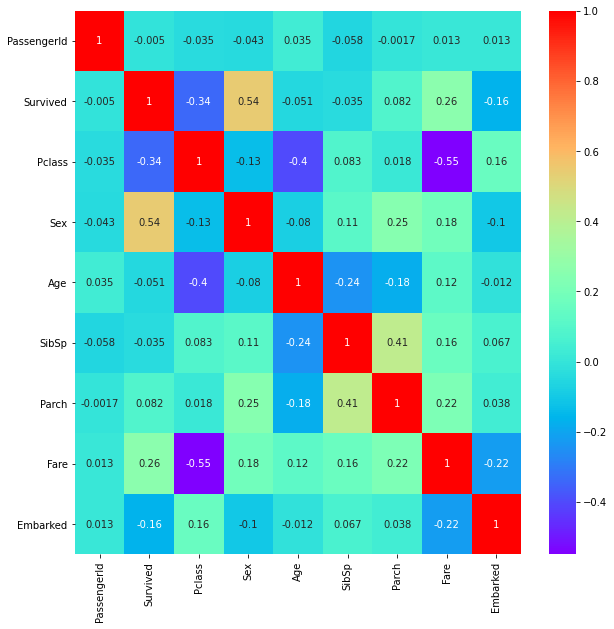

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic_data.corr(),annot=True,cmap='rainbow')

In [74]:
titanic_data.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
0         1            93
          0            75
1         0            47
          1            30
2         0           427
          1           217
3         1             2
Name: Survived, dtype: int64

In [75]:
titanic_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [76]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [77]:
X=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']

In [78]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,2
3,1,1,35.0,1,0,53.1000,2
4,3,0,35.0,0,0,8.0500,2


In [79]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
model=LogisticRegression()
model.fit(X_train,y_train)

c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
y_pred=model.predict(X_test)

In [85]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(y_test,y_pred)*100

81.56424581005587